In [1]:
from __future__ import print_function

# Importing the Dataset

In [2]:
import pandas as pd
import numpy as np
import pickle 
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from sklearn.tree import DecisionTreeRegressor


# linear regression feature importance
from sklearn.datasets import make_regression

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
yellow_trip_df = pd.read_csv('Yellow_tripdata_2019-10.csv')

In [4]:
yellow_trip_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2019-10-01 00:19:55,2019-10-01 00:23:57,1.0,0.40,1.0,N,48,163,2.0,4.50,3.00,0.5,0.0,0.00,0.3,8.30,2.5
1,1.0,2019-10-01 00:40:19,2019-10-01 00:55:17,2.0,4.30,1.0,N,144,141,1.0,14.50,3.00,0.5,2.0,0.00,0.3,20.30,2.5
2,1.0,2019-10-01 00:06:52,2019-10-01 00:21:23,1.0,5.00,1.0,N,137,80,1.0,17.00,3.00,0.5,5.2,0.00,0.3,26.00,2.5
3,2.0,2019-10-01 00:36:08,2019-10-01 00:36:15,1.0,0.00,1.0,N,25,25,4.0,-2.50,-0.50,-0.5,0.0,0.00,-0.3,-3.80,0.0
4,2.0,2019-10-01 00:36:08,2019-10-01 00:36:15,1.0,0.00,1.0,N,25,25,2.0,2.50,0.50,0.5,0.0,0.00,0.3,3.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7213886,NaN,2019-10-31 23:20:00,2019-10-31 23:56:00,NaN,19.53,NaN,NaN,77,119,NaN,63.83,2.75,0.5,0.0,6.12,0.3,73.50,0.0
7213887,NaN,2019-10-31 23:42:00,2019-11-01 00:07:00,NaN,4.96,NaN,NaN,238,137,NaN,28.95,2.75,0.5,0.0,0.00,0.3,32.50,0.0
7213888,NaN,2019-10-31 23:50:35,2019-11-01 00:08:45,NaN,4.63,NaN,NaN,186,166,NaN,29.26,2.75,0.0,0.0,0.00,0.3,32.31,0.0
7213889,NaN,2019-10-31 23:29:26,2019-10-31 23:59:15,NaN,17.49,NaN,NaN,45,122,NaN,54.25,2.75,0.0,0.0,6.12,0.3,63.42,0.0


In [5]:
#green_trip_df = pd.read_csv('green_tripdata_2019-10.csv')

In [6]:
#green_trip_df

In [7]:
#fhv_trip_df = pd.read_csv('fhv_tripdata_2019-10.csv')

In [8]:
#fhv_trip_df

In [9]:
#fhvhv_trip_df = pd.read_csv('fhvhv_tripdata_2019-10.csv')

In [10]:
#fhvhv_trip_df

In [11]:
taxi_zone_df = pd.read_csv('taxi+_zone_lookup.csv')

In [12]:
taxi_zone_df

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN


# Exploring Yellow Trips Data

In [13]:
yellow_trip_df.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2019-10-01 00:19:55,2019-10-01 00:23:57,1.0,0.4,1.0,N,48,163,2.0,4.5,3.0,0.5,0.0,0.0,0.3,8.3,2.5
1,1.0,2019-10-01 00:40:19,2019-10-01 00:55:17,2.0,4.3,1.0,N,144,141,1.0,14.5,3.0,0.5,2.0,0.0,0.3,20.3,2.5
2,1.0,2019-10-01 00:06:52,2019-10-01 00:21:23,1.0,5.0,1.0,N,137,80,1.0,17.0,3.0,0.5,5.2,0.0,0.3,26.0,2.5
3,2.0,2019-10-01 00:36:08,2019-10-01 00:36:15,1.0,0.0,1.0,N,25,25,4.0,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,0.0
4,2.0,2019-10-01 00:36:08,2019-10-01 00:36:15,1.0,0.0,1.0,N,25,25,2.0,2.5,0.5,0.5,0.0,0.0,0.3,3.8,0.0


In [14]:
yellow_trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7213891 entries, 0 to 7213890
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(13), int64(2), object(3)
memory usage: 990.7+ MB


In [15]:
# number of missing/null values each columns
yellow_trip_df.isna().sum() 

VendorID                 46723
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          46723
trip_distance                0
RatecodeID               46723
store_and_fwd_flag       46723
PULocationID                 0
DOLocationID                 0
payment_type             46723
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
dtype: int64

In [16]:
yellow_trip_df.apply(pd.Series.nunique)

VendorID                       2
tpep_pickup_datetime     2218590
tpep_dropoff_datetime    2221573
passenger_count               10
trip_distance               4555
RatecodeID                     7
store_and_fwd_flag             2
PULocationID                 260
DOLocationID                 261
payment_type                   4
fare_amount                 5396
extra                         48
mta_tax                        9
tip_amount                  3809
tolls_amount                1068
improvement_surcharge          3
total_amount               12652
congestion_surcharge           6
dtype: int64

## Inspect Some Features that their entries less than 10

### VendorID
A code indicating the TPEP provider that provided the record. 

1= Creative Mobile Technologies, LLC;

2= VeriFone Inc.

In [17]:
yellow_trip_df['VendorID'].unique()                  

array([ 1.,  2., nan])

### RateCodeID:
The final rate code in effect at the end of the trip.

1= Standard rate

2=JFK

3=Newark

4=Nassau or Westchester

5=Negotiated fare

6=Group ride

In [18]:
yellow_trip_df['RatecodeID'].unique()                  

array([ 1.,  5.,  3.,  2.,  4., 99.,  6., nan])

In [19]:
# The number of passengers in the vehicle. This is a driver-entered value.
yellow_trip_df['passenger_count'].unique()                  

array([ 1.,  2.,  3.,  0.,  5.,  4.,  6.,  8.,  9.,  7., nan])

### Store and fwd flag:
This flag indicates whether the trip record was held in vehicle 
memory before sending to the vendor, aka “store and forward,” 
because the vehicle did not have a connection to the server.

Y= store and forward trip

N= not a store and forward trip

In [20]:
yellow_trip_df['store_and_fwd_flag'].unique() 

array(['N', 'Y', nan], dtype=object)

### payment_type:
A numeric code signifying how the passenger paid for the trip. 

1= Credit card

2= Cash

3= No charge

4= Dispute

5= Unknown

6= Voided trip


In [21]:
yellow_trip_df['payment_type'].unique() 

array([ 2.,  1.,  4.,  3., nan])

### Show the differences btween these prices and how they effects on the trips's prices

#### fare_amount:
The time-and-distance fare calculated by the meter 

#### extra, 
Miscellaneous extras and surcharges. Currently, this only includes
the $0.50 and $1 rush hour and overnight charges

#### mta_tax:
$0.50 MTA tax that is automatically triggered based on the metered 
rate in use.

#### tip_amount:
Tip amount – This field is automatically populated for credit card 
tips. Cash tips are not included.

#### tolls_amount
Total amount of all tolls paid in trip

#### improvement_surcharge:
$0.30 improvement surcharge assessed trips at the flag drop. The 
improvement surcharge began being levied in 2015.

#### total amount:
The total amount charged to passengers. Does not include cash tips.

#### congestion_surcharge:
On January 1st 2019, New York State’s congestion surcharge will take effect. As a result, trips in taxis and For-Hire Vehicles will be charged a surcharge for trips that start, end or pass through Congestion Zone. The Congestion Zone is Manhattan, south of 96th Street 

In [22]:
# $0.50 MTA tax that is automatically triggered based on the metered rate in use.
yellow_trip_df['mta_tax'].unique()                         

array([ 0.5 , -0.5 ,  0.  ,  3.3 ,  0.35, 19.42,  0.25,  1.1 , 60.  ])

### Congestion Surcharge :

$2.50 for non-shared trips in taxicabs

$2.75 for non-shared trips in For-Hire-Vehicles, including limousines, and Street-Hail Liveries (Green Taxis)

OR

$0.75 for shared-rides in any type of vehicle

No surcharge for Access-A-Ride, or any other MTA dispatched trip.


In [23]:
yellow_trip_df['congestion_surcharge'].unique()                                                        

array([ 2.5 ,  0.  , -2.5 ,  0.75,  2.75,  0.3 ])

In [24]:
yellow_trip_df['improvement_surcharge'].unique()                                                        

array([ 0.3, -0.3,  0. ])

# Preprocessing Dataset

In [25]:
yellow_trip_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [26]:
yellow_trip_df.dropna(how='any',inplace=True)

In [27]:
yellow_trip_df.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64

In [28]:
#### Checking for duplicates
yellow_trip_df.duplicated().sum()

1

In [29]:
yellow_trip_df= yellow_trip_df.drop_duplicates()  ## dropes duplicates
yellow_trip_df.duplicated().sum()

0

In [30]:
yellow_trip_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7167167 entries, 0 to 7167167
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(13), int64(2), object(3)
memory usage: 1.0+ GB


In [31]:
# convert the type of 'tpep_pickup_datetime' & 'tpep_dropoff_datetime' to DateTime Type
yellow_trip_df['tpep_pickup_datetime']=pd.to_datetime(yellow_trip_df['tpep_pickup_datetime'])
yellow_trip_df['tpep_dropoff_datetime']=pd.to_datetime(yellow_trip_df['tpep_dropoff_datetime'])

### Creating new features

In [32]:
#Now, extract and create a new feature 'Day number' & 'Hour' from the above two coulmns,Monday=0 and Sunday=6
yellow_trip_df['pickup_day_num']=yellow_trip_df['tpep_pickup_datetime'].dt.weekday
yellow_trip_df['dropoff_day_num']=yellow_trip_df['tpep_dropoff_datetime'].dt.weekday

In [33]:
yellow_trip_df.head(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_day_num,dropoff_day_num
0,1.0,2019-10-01 00:19:55,2019-10-01 00:23:57,1.0,0.4,1.0,N,48,163,2.0,4.5,3.0,0.5,0.0,0.0,0.3,8.3,2.5,1,1
1,1.0,2019-10-01 00:40:19,2019-10-01 00:55:17,2.0,4.3,1.0,N,144,141,1.0,14.5,3.0,0.5,2.0,0.0,0.3,20.3,2.5,1,1


In [34]:
# Also extract and create another feature 'Hour'in the 24-hour format., from 'tpep_pickup_datetime' & 'tpep_pickup_datetime'  
yellow_trip_df['pickup_hour']=yellow_trip_df['tpep_pickup_datetime'].dt.hour
yellow_trip_df['dropoff_hour']=yellow_trip_df['tpep_dropoff_datetime'].dt.hour

In [35]:
yellow_trip_df.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_day_num,dropoff_day_num,pickup_hour,dropoff_hour
7167163,1.0,2019-10-31 23:45:44,2019-11-01 00:19:07,1.0,12.80,1.0,N,133,234,2.0,...,0.5,0.00,0.0,0.3,42.30,2.5,3,4,23,0
7167164,2.0,2019-10-31 23:16:13,2019-10-31 23:26:28,1.0,2.13,1.0,N,239,141,2.0,...,0.5,0.00,0.0,0.3,13.80,2.5,3,3,23,23
7167165,2.0,2019-10-31 23:33:26,2019-10-31 23:49:39,2.0,5.59,1.0,N,236,148,1.0,...,0.5,4.56,0.0,0.3,27.36,2.5,3,3,23,23
7167166,2.0,2019-10-31 23:57:00,2019-11-01 00:15:54,4.0,2.38,1.0,N,79,100,1.0,...,0.5,3.46,0.0,0.3,20.76,2.5,3,4,23,0
7167167,2.0,2019-10-31 23:46:11,2019-11-01 00:29:35,1.0,19.03,2.0,N,132,48,2.0,...,0.5,0.00,0.0,0.3,55.30,2.5,3,4,23,0


### Polynomial Features:
to improve our features and the for  of our hypothesis function by combining multiple features into one. 
so i think this feature the most significant target that i'll used later to predict the trip duration.

In [36]:
yellow_trip_df['trip_duration'] = (yellow_trip_df['tpep_dropoff_datetime'] - yellow_trip_df['tpep_pickup_datetime']).dt.total_seconds()/60
yellow_trip_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_day_num,dropoff_day_num,pickup_hour,dropoff_hour,trip_duration
0,1.0,2019-10-01 00:19:55,2019-10-01 00:23:57,1.0,0.4,1.0,N,48,163,2.0,...,0.0,0.0,0.3,8.3,2.5,1,1,0,0,4.033333
1,1.0,2019-10-01 00:40:19,2019-10-01 00:55:17,2.0,4.3,1.0,N,144,141,1.0,...,2.0,0.0,0.3,20.3,2.5,1,1,0,0,14.966667
2,1.0,2019-10-01 00:06:52,2019-10-01 00:21:23,1.0,5.0,1.0,N,137,80,1.0,...,5.2,0.0,0.3,26.0,2.5,1,1,0,0,14.516667
3,2.0,2019-10-01 00:36:08,2019-10-01 00:36:15,1.0,0.0,1.0,N,25,25,4.0,...,0.0,0.0,-0.3,-3.8,0.0,1,1,0,0,0.116667
4,2.0,2019-10-01 00:36:08,2019-10-01 00:36:15,1.0,0.0,1.0,N,25,25,2.0,...,0.0,0.0,0.3,3.8,0.0,1,1,0,0,0.116667


In [37]:
#yellow_trip_df['avg_speed_kph']=yellow_trip_df['trip_distance']/yellow_trip_df['trip_duration']
#yellow_trip_df
yellow_trip_df['trip_duration'].unique

<bound method Series.unique of 0           4.033333
1          14.966667
2          14.516667
3           0.116667
4           0.116667
             ...    
7167163    33.383333
7167164    10.250000
7167165    16.216667
7167166    18.900000
7167167    43.400000
Name: trip_duration, Length: 7167167, dtype: float64>

In [38]:
yellow_trip_df['fare_amount'].values

array([ 4.5, 14.5, 17. , ..., 19. , 13.5, 52. ])

In [39]:
yellow_trip_df['trip_distance'].values  

array([ 0.4 ,  4.3 ,  5.  , ...,  5.59,  2.38, 19.03])

In [40]:
yellow_trip_df['tolls_amount'].values

array([0., 0., 0., ..., 0., 0., 0.])

#  Visualizing to explore the dataset

### Remove outlier to give us accurate results in regression analysis


In [41]:
def remove_outliers(yellow_trip_df):
    return yellow_trip_df[(yellow_trip_df['fare_amount'] >= 1.) & 
              (yellow_trip_df['fare_amount'] <= 500.) &
              (yellow_trip_df['trip_duration'] >= 14) & 
              (yellow_trip_df['trip_duration'] <= 38) &
              (yellow_trip_df['mta_tax'] >= 0) & 
              (yellow_trip_df['mta_tax'] <= 20) & 
              (yellow_trip_df['trip_distance'] >= 2) & 
              (yellow_trip_df['trip_distance'] <= 13) & 
              (yellow_trip_df['tolls_amount'] >= 0) & 
              (yellow_trip_df['tolls_amount'] <= 6) & 
              (yellow_trip_df['congestion_surcharge'] >= -2.5) & 
              (yellow_trip_df['congestion_surcharge'] <= 2.75 ) & 
              (yellow_trip_df['improvement_surcharge'] >= -0.3) & 
              (yellow_trip_df['improvement_surcharge'] <= 0.3) & 
              (yellow_trip_df['payment_type'] >=1) & 
              (yellow_trip_df['payment_type'] <= 4) & 
              (yellow_trip_df['passenger_count'] >= 1) & 
              (yellow_trip_df['passenger_count'] <= 10) &
              (yellow_trip_df['RatecodeID'] >= 1) & 
              (yellow_trip_df['RatecodeID'] <= 6)]   

In [42]:
yellow_trip_df = remove_outliers(yellow_trip_df)
yellow_trip_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_day_num,dropoff_day_num,pickup_hour,dropoff_hour,trip_duration
1,1.0,2019-10-01 00:40:19,2019-10-01 00:55:17,2.0,4.30,1.0,N,144,141,1.0,...,2.00,0.0,0.3,20.30,2.5,1,1,0,0,14.966667
2,1.0,2019-10-01 00:06:52,2019-10-01 00:21:23,1.0,5.00,1.0,N,137,80,1.0,...,5.20,0.0,0.3,26.00,2.5,1,1,0,0,14.516667
11,2.0,2019-09-30 23:42:13,2019-10-01 00:02:43,1.0,10.25,1.0,N,132,132,1.0,...,6.16,0.0,0.3,36.96,0.0,0,1,23,0,20.500000
24,1.0,2019-10-01 00:57:11,2019-10-01 01:14:41,1.0,5.80,1.0,N,246,42,1.0,...,6.54,0.0,0.3,28.34,2.5,1,1,0,1,17.500000
26,1.0,2019-10-01 00:30:38,2019-10-01 00:52:14,1.0,4.80,1.0,N,48,179,1.0,...,6.35,0.0,0.3,27.65,2.5,1,1,0,0,21.600000


<AxesSubplot:xlabel='trip_duration'>

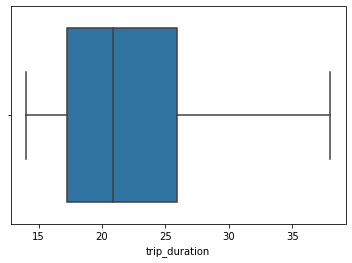

In [43]:
sns.boxplot(yellow_trip_df['trip_duration'])


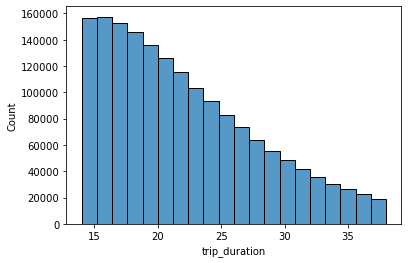

In [44]:
sns.histplot(yellow_trip_df['trip_duration'],kde=False,bins=20);

### Display total profit amount for yellow trips per day


<AxesSubplot:xlabel='pickup_hour', ylabel='total_amount'>

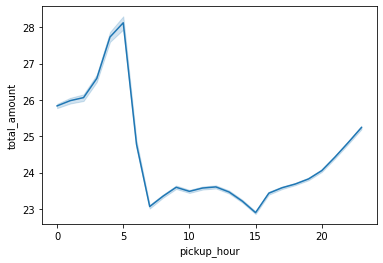

In [45]:
sns.lineplot(x='pickup_hour',y='total_amount',data=yellow_trip_df)

### Display most pickup & dropoff passengers zones


In [46]:
top_5_zone=yellow_trip_df.PULocationID.value_counts(ascending=False).head()
top_5_zone1=yellow_trip_df.DOLocationID.value_counts(ascending=False).head()
top_5_zone

161    70240
186    65455
230    60769
162    57114
236    56462
Name: PULocationID, dtype: int64

In [47]:
top_5_zone1

236    58602
161    46605
231    44703
237    41894
239    38502
Name: DOLocationID, dtype: int64

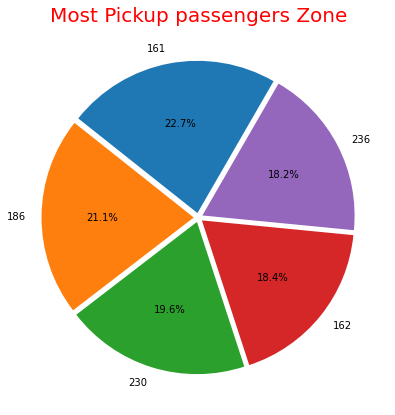

In [48]:
plt.figure(figsize = [9,7])
plt.title('Most Pickup passengers Zone',fontsize=20,color = 'r')

explode = (0.03, 0.03, 0.03, 0.03, 0.03)
labels = ['161','186','230','162','236']


plt.pie(x=top_5_zone, explode=explode,startangle=60, labels=labels,autopct='%0.01f%%')

plt.show()


### Display most drop off zone


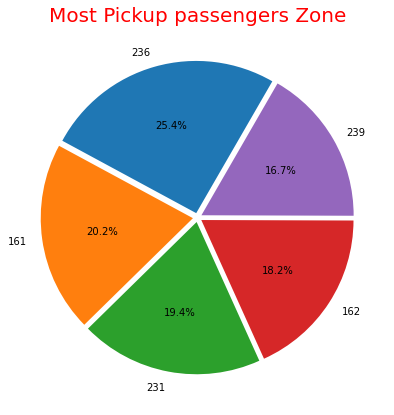

In [49]:
plt.figure(figsize = [9,7])
plt.title('Most Pickup passengers Zone',fontsize=20,color = 'r')

explode = (0.03, 0.03, 0.03, 0.03, 0.03)
labels = ['236','161','231','162','239']


plt.pie(x=top_5_zone1, explode=explode,startangle=60, labels=labels,autopct='%0.01f%%')

plt.show()

### Display most pickup & dropoff hours

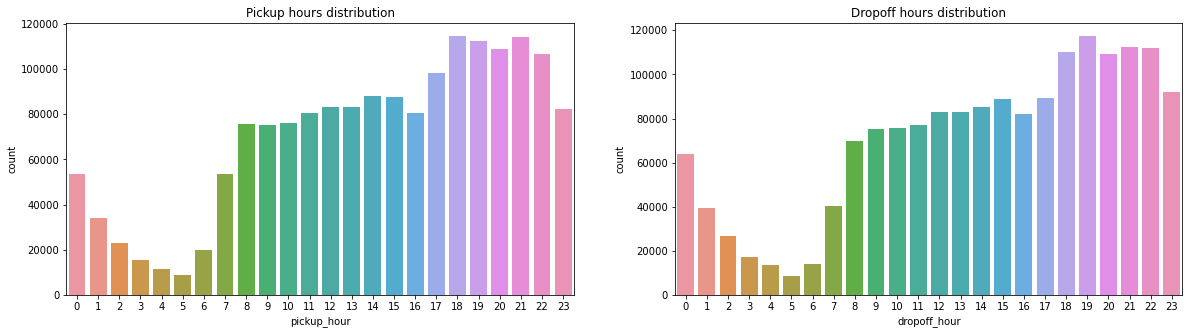

In [50]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup hours distribution')
ax=sns.countplot(x="pickup_hour",data=yellow_trip_df,ax=ax1)
ax2.set_title('Dropoff hours distribution')
ax=sns.countplot(x="dropoff_hour",data=yellow_trip_df,ax=ax2)

### Display most pickup & dropoff days

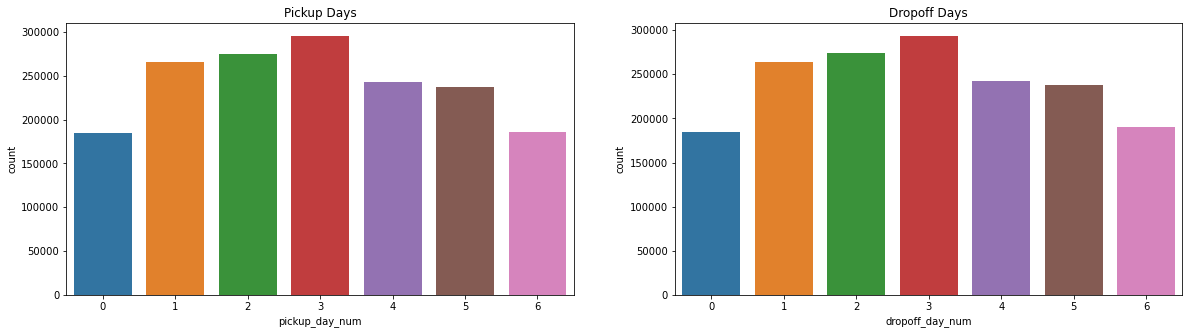

In [51]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup Days')
ax=sns.countplot(x="pickup_day_num",data=yellow_trip_df,ax=ax1)
ax2.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_day_num",data=yellow_trip_df,ax=ax2)


### The correlations between the variables

In [52]:
yellow_trip_df.corr()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_day_num,dropoff_day_num,pickup_hour,dropoff_hour,trip_duration
VendorID,1.000000,0.152365,0.033159,0.001856,-0.010193,-0.003651,-0.014671,0.016280,-0.905511,0.007468,0.016544,0.009519,-0.007840,0.020321,-0.010374,0.009710,0.010093,-0.001356,-0.004326,-0.006933
passenger_count,0.152365,1.000000,-0.003017,-0.001841,-0.005272,-0.002710,0.026830,-0.001870,-0.137511,0.000693,-0.016061,-0.001083,0.005439,-0.006422,0.012132,0.032001,0.032246,0.011081,0.008728,0.004931
trip_distance,0.033159,-0.003017,1.000000,0.078014,-0.090485,-0.125883,0.050469,0.885674,-0.072374,-0.035491,0.204392,0.108476,0.001593,0.801192,-0.333154,0.018291,0.019290,-0.091002,-0.113908,0.352235
RatecodeID,0.001856,-0.001841,0.078014,1.000000,-0.010646,0.024071,0.008800,0.229126,-0.029235,-0.627886,0.042192,0.018066,-0.001662,0.198817,-0.104191,0.003117,0.003120,-0.008588,-0.009556,0.009472
PULocationID,-0.010193,-0.005272,-0.090485,-0.010646,1.000000,0.019071,-0.026373,-0.070213,0.020575,0.003760,0.006766,-0.002059,0.000378,-0.048765,0.096275,-0.033083,-0.033526,0.015759,0.021693,-0.005326
DOLocationID,-0.003651,-0.002710,-0.125883,0.024071,0.019071,1.000000,-0.032189,-0.095565,0.016358,-0.010172,0.001601,0.012839,-0.000638,-0.072356,0.080029,-0.022430,-0.022878,0.028241,0.035913,-0.028896
payment_type,-0.014671,0.026830,0.050469,0.008800,-0.026373,-0.032189,1.000000,0.044767,-0.020205,-0.001841,-0.666031,-0.002650,-0.012943,-0.228551,-0.139234,0.030813,0.029605,-0.042343,-0.036712,0.014455
fare_amount,0.016280,-0.001870,0.885674,0.229126,-0.070213,-0.095565,0.044767,1.000000,-0.060246,-0.152529,0.243650,0.101016,0.004331,0.916789,-0.267588,0.016169,0.017101,-0.072227,-0.083423,0.669069
extra,-0.905511,-0.137511,-0.072374,-0.029235,0.020575,0.016358,-0.020205,-0.060246,1.000000,0.020393,0.013886,-0.010984,0.000128,-0.012275,0.165017,-0.054246,-0.053623,0.120676,0.112815,-0.006543
mta_tax,0.007468,0.000693,-0.035491,-0.627886,0.003760,-0.010172,-0.001841,-0.152529,0.020393,1.000000,-0.027982,-0.005888,-0.005010,-0.131422,0.060572,-0.004647,-0.004700,0.006810,0.007839,-0.005591


### Dummy variables

Dummy variables are binary feature columns corresponding to each category. The value is 1 if the observation is in that category, and 0 if not. We can then just use these columns as features in our regression model.

Pandas makes it very easy for us to make this conversion. Notice that the new dummies df has 18 columns, 1 for each category.

In [53]:
yellow_trip_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1687450 entries, 1 to 7167166
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               1687450 non-null  float64       
 1   tpep_pickup_datetime   1687450 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  1687450 non-null  datetime64[ns]
 3   passenger_count        1687450 non-null  float64       
 4   trip_distance          1687450 non-null  float64       
 5   RatecodeID             1687450 non-null  float64       
 6   store_and_fwd_flag     1687450 non-null  object        
 7   PULocationID           1687450 non-null  int64         
 8   DOLocationID           1687450 non-null  int64         
 9   payment_type           1687450 non-null  float64       
 10  fare_amount            1687450 non-null  float64       
 11  extra                  1687450 non-null  float64       
 12  mta_tax                16874

In [54]:
#yellow_trip_df = yellow_trip_df.select_dtypes(exclude=['object'])

In [55]:
#pd.get_dummies(yellow_trip_df['store_and_fwd_flag'], drop_first=True)

In [56]:
#yellow_trip_df = pd.get_dummies(yellow_trip_df['store_and_fwd_flag'], drop_first=True) #can just apply it to the whole df
#yellow_trip_df

In [57]:
yellow_trip_df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_day_num,dropoff_day_num,pickup_hour,dropoff_hour,trip_duration
count,1.687450e+06,1.687450e+06,1.687450e+06,1.687450e+06,1.687450e+06,1.687450e+06,1.687450e+06,1.687450e+06,1.687450e+06,1.687450e+06,1.687450e+06,1.687450e+06,1.687450e+06,1.687450e+06,1.687450e+06,1.687450e+06,1.687450e+06,1.687450e+06,1.687450e+06,1.687450e+06
mean,1.666240e+00,1.582619e+00,4.118096e+00,1.005894e+00,1.611566e+02,1.556468e+02,1.260808e+00,1.772040e+01,1.126976e+00,4.997142e-01,2.783498e+00,8.067356e-03,2.999580e-01,2.400080e+01,2.338422e+00,2.950227e+00,2.960454e+00,1.436759e+01,1.436260e+01,2.208512e+01
std,4.715554e-01,1.174790e+00,2.113446e+00,1.389428e-01,6.768631e+01,7.492873e+01,4.547426e-01,5.428664e+00,1.221044e+00,1.217726e-02,2.396435e+00,1.857905e-01,3.547575e-03,6.391256e+00,6.146763e-01,1.863780e+00,1.869217e+00,6.105114e+00,6.278857e+00,5.888677e+00
min,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.300000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.400000e+01
25%,1.000000e+00,1.000000e+00,2.600000e+00,1.000000e+00,1.130000e+02,9.000000e+01,1.000000e+00,1.350000e+01,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.955000e+01,2.500000e+00,1.000000e+00,1.000000e+00,1.000000e+01,1.000000e+01,1.723333e+01
50%,2.000000e+00,1.000000e+00,3.400000e+00,1.000000e+00,1.610000e+02,1.610000e+02,1.000000e+00,1.650000e+01,5.000000e-01,5.000000e-01,3.150000e+00,0.000000e+00,3.000000e-01,2.256000e+01,2.500000e+00,3.000000e+00,3.000000e+00,1.500000e+01,1.500000e+01,2.088333e+01
75%,2.000000e+00,2.000000e+00,4.990000e+00,1.000000e+00,2.310000e+02,2.320000e+02,2.000000e+00,2.050000e+01,2.500000e+00,5.000000e-01,4.260000e+00,0.000000e+00,3.000000e-01,2.730000e+01,2.500000e+00,5.000000e+00,5.000000e+00,1.900000e+01,2.000000e+01,2.593333e+01
max,2.000000e+00,9.000000e+00,1.300000e+01,5.000000e+00,2.650000e+02,2.650000e+02,4.000000e+00,2.500000e+02,9.300000e+00,3.300000e+00,3.350000e+02,6.000000e+00,3.000000e-01,3.573000e+02,2.750000e+00,6.000000e+00,6.000000e+00,2.300000e+01,2.300000e+01,3.800000e+01


There are alot of variables, Let's pick out just a few columns and start building models using that.

In [58]:
yellow_trip_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'pickup_day_num',
       'dropoff_day_num', 'pickup_hour', 'dropoff_hour', 'trip_duration'],
      dtype='object')

#### Setting up for modeling and building a baseline:

In [59]:
#create a smaller dataset with most important features from my view point... 'pickup_day_num','dropoff_day_num', 'pickup_hour', 'dropoff_hour'
smaller_df = yellow_trip_df.loc[:,[ 'trip_distance','fare_amount', 'extra',
       'mta_tax','tip_amount','tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge','trip_duration']]

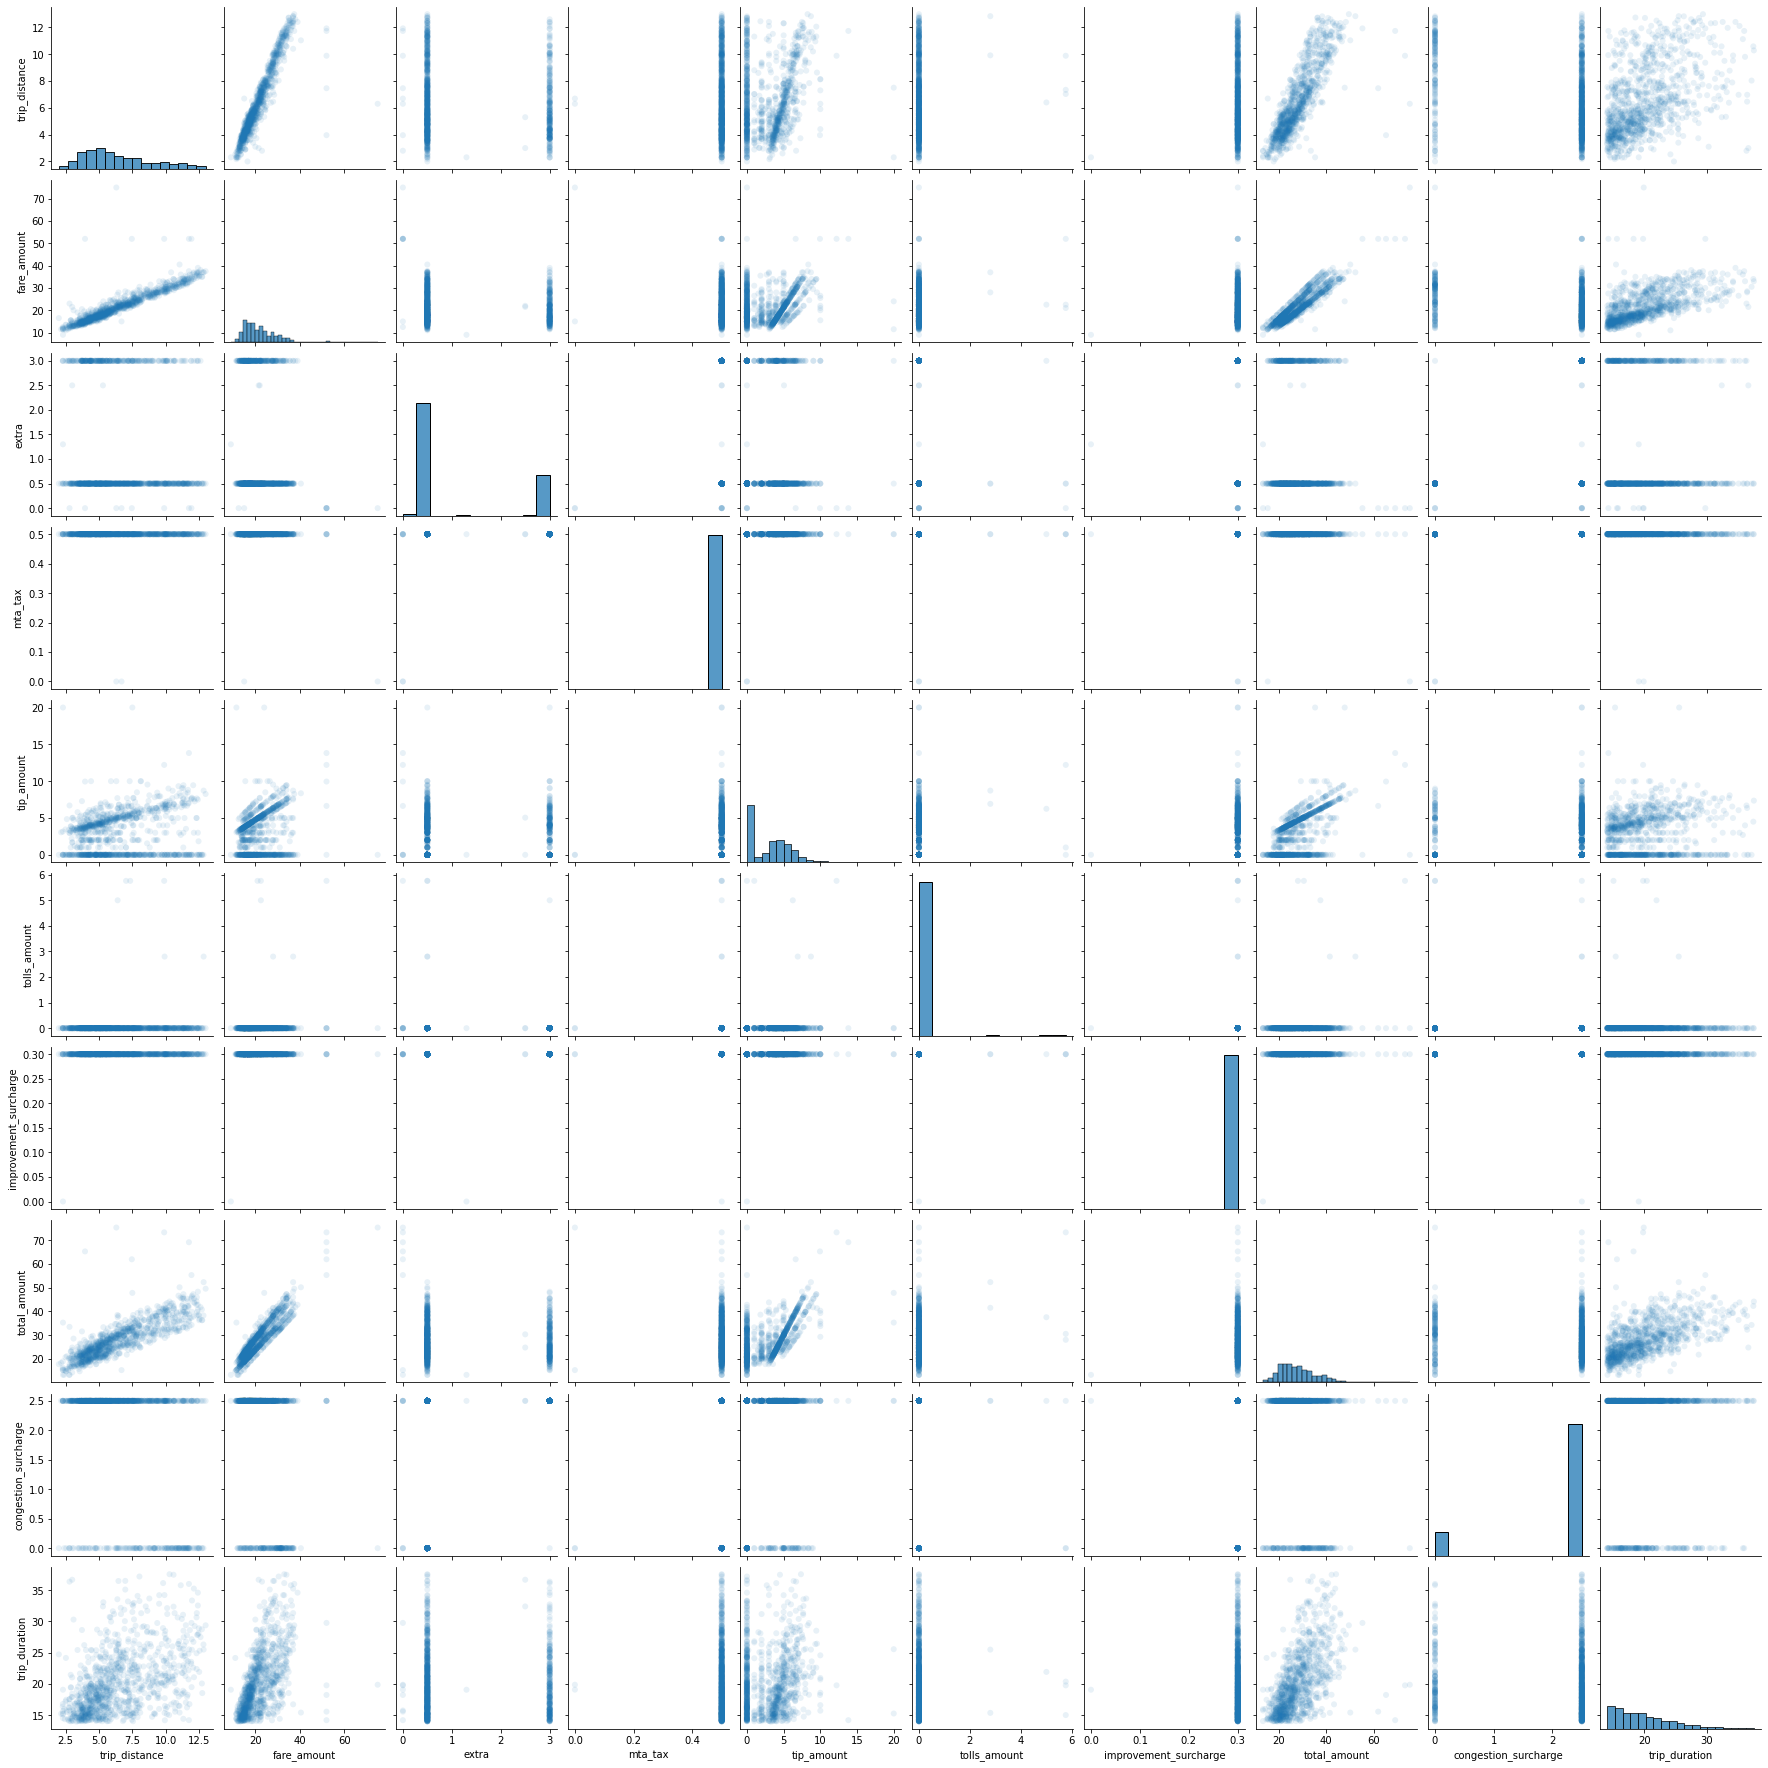

In [60]:
sns.pairplot(smaller_df[:1000], plot_kws=dict(alpha=.1, edgecolor='none'))

In [61]:
#Separate our features matrix(x) and our target vector(y)
x,y = smaller_df.drop(['total_amount','trip_distance','trip_duration'],axis=1), smaller_df['total_amount']

In [62]:
x.columns

Index(['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'congestion_surcharge'],
      dtype='object')

Linear machine learning algorithms fit a model where the prediction is the weighted sum of the input values.

Feature: 0, Score: 0.99773
Feature: 1, Score: 0.09807
Feature: 2, Score: 1.41890
Feature: 3, Score: 1.01045
Feature: 4, Score: 1.00999
Feature: 5, Score: -1.52945
Feature: 6, Score: 0.94838


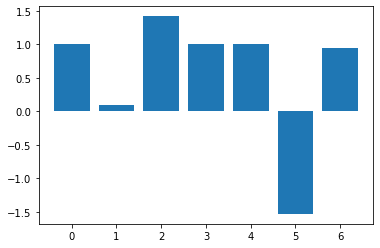

In [63]:
# linear regression feature importance for 1st model
# define the model
model = LinearRegression()
# fit the model
model.fit(x, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([X for X in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.76852
Feature: 1, Score: 0.00182
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.22193
Feature: 4, Score: 0.00077
Feature: 5, Score: 0.00011
Feature: 6, Score: 0.00685


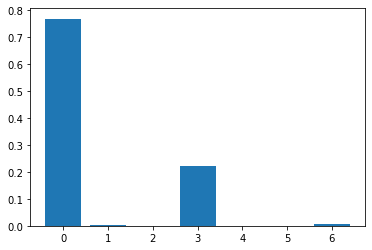

In [64]:
# decision tree for feature importance on a regression problem
# define the model
model1 = DecisionTreeRegressor()
# fit the model
model1.fit(x, y)
# get importance
importance1 = model1.feature_importances_
# summarize feature importance
for i1,v1 in enumerate(importance1):
    print('Feature: %0d, Score: %.5f' % (i1,v1))
# plot feature importance
pyplot.bar([X1 for X1 in range(len(importance1))], importance1)
pyplot.show()

In [65]:
#Separate our features matrix(x) and our target vector(y)
x1,y1 = smaller_df.loc[:,['trip_distance','trip_duration','total_amount']], smaller_df['fare_amount']

In [66]:
x1.columns

Index(['trip_distance', 'trip_duration', 'total_amount'], dtype='object')

Feature: 0, Score: 1.41245
Feature: 1, Score: 0.26689
Feature: 2, Score: 0.24788


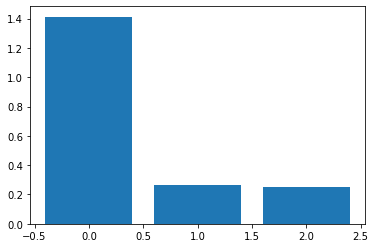

In [67]:
# linear regression feature importance for 2nd model
# define the model
model3 = LinearRegression()
# fit the model
model3.fit(x1, y1)
# get importance
importance3 = model3.coef_
# summarize feature importance
for i3,v3 in enumerate(importance3):
    print('Feature: %0d, Score: %.5f' % (i3,v3))
# plot feature importance
pyplot.bar([X3 for X3 in range(len(importance3))], importance3)
pyplot.show()

Feature: 0, Score: 0.19987
Feature: 1, Score: 0.06791
Feature: 2, Score: 0.73222


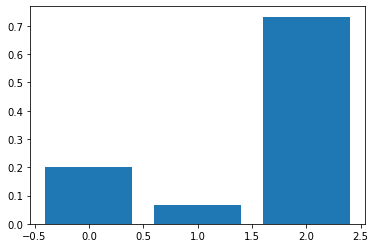

In [68]:
# decision tree for feature importance on a regression problem
# define the model
model4 = DecisionTreeRegressor()
# fit the model
model4.fit(x1, y1)
# get importance
importance4 = model4.feature_importances_
# summarize feature importance
for i4,v4 in enumerate(importance4):
    print('Feature: %0d, Score: %.5f' % (i4,v4))
# plot feature importance
pyplot.bar([X4 for X4 in range(len(importance4))], importance4)
pyplot.show()

from the above figure we see the scores suggest that the model found some important features and marked all other features with a zero coefficient, as we will drop it from the model.

### Ordinary Least Squares Regression with Statsmodels
Now that we have a feel for our data, let's jump right in and try a basic regression model.

In [69]:
x.head()

,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge
1,14.5,3.0,0.5,2.00,0.0,0.3,2.5
2,17.0,3.0,0.5,5.20,0.0,0.3,2.5
11,29.5,0.5,0.5,6.16,0.0,0.3,0.0
24,18.0,3.0,0.5,6.54,0.0,0.3,2.5
26,17.5,3.0,0.5,6.35,0.0,0.3,2.5


In [70]:
x1.head()

,trip_distance,trip_duration,total_amount
1,4.30,14.966667,20.30
2,5.00,14.516667,26.00
11,10.25,20.500000,36.96
24,5.80,17.500000,28.34
26,4.80,21.600000,27.65


In [71]:
x.shape, y.shape

((1687450, 7), (1687450,))

In [72]:
x1.shape,y1.shape

((1687450, 3), (1687450,))

In [73]:
# Create 1st model
model = sm.OLS(y, x)

# Fit the model to our training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           total_amount   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          9.983e+08
Date:                Sat, 27 Nov 2021   Prob (F-statistic):                        0.00
Time:                        15:52:14   Log-Likelihood:                     -7.8768e+05
No. Observations:             1687450   AIC:                                  1.575e+06
Df Residuals:                 1687443   BIC:                                  1.575e+06
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
fare_amount               0.9979   5.96e-05   1.67e+04      0.000       0.998       0.998
extra                     0.0981      0.000    397.502      0.000       0.098       0.099
mta_tax                   1.7801      0.022     80.581      0.000       1.737       1.823
tip_amount                1.0104      0.000   7799.052      0.000       1.010       1.011
tolls_amount              1.0097      0.002    628.026      0.000       1.007       1.013
improvement_surcharge     0.9230      0.037     24.644      0.000       0.850       0.996
congestion_surcharge      0.9491      0.001   1846.569      0.000       0.948       0.950
==============================================================================
Omnibus:                   526579.893   Durbin-Watson:                   0.481
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3767117.381
Skew:                           1.316   Prob(JB):                         0.00
Kurtosis:                       9.830   Cond. No.                     2.76e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
# Create 2nd model
model2 = sm.OLS(y1, x1)

# Fit the model to our training set
fit = model2.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            fare_amount   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          1.262e+08
Date:                Sat, 27 Nov 2021   Prob (F-statistic):                        0.00
Time:                        15:52:15   Log-Likelihood:                     -2.7503e+06
No. Observations:             1687450   AIC:                                  5.501e+06
Df Residuals:                 1687447   BIC:                                  5.501e+06
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
trip_distance     1.4093      0.001   1834.739      0.000       1.408       1.411
trip_duration     0.2678      0.000   1250.248      0.000       0.267       0.268
total_amount      0.2500      0.000    878.308      0.000       0.249       0.251
==============================================================================
Omnibus:                  3360369.126   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      51384648668.872
Skew:                          15.504   Prob(JB):                         0.00
Kurtosis:                     857.321   Cond. No.                         28.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
def split_and_validate(x, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    # perform train/val split
    x_train, x_val, y_train, y_val = \
        train_test_split(x, y, test_size=0.2, random_state=42)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(x_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(x_val, y_val)
    
    # report results
    print('\nValidation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(x.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}') 

Great, let's go ahead and run this function on our baseline feature set and take some time to analyze the results.

In [76]:
split_and_validate(x, y)


Validation R^2 score was: 0.9963711155014562
Feature coefficient results: 

fare_amount : 1.00
extra : 0.10
mta_tax : 1.43
tip_amount : 1.01
tolls_amount : 1.01
improvement_surcharge : -1.52
congestion_surcharge : 0.95


In [77]:
def split_and_validate(x1, y1):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    # perform train/val split
    x_train1, x_val1, y_train1, y_val1 = \
        train_test_split(x1, y1, test_size=0.2, random_state=42)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(x_train1, y_train1)
    
    # score fit model on validation data
    val_score1 = lr_model.score(x_val1, y_val1)
    
    # report results
    print('\nValidation R^2 score was:', val_score1)
    print('Feature coefficient results: \n')
    for feature, coef in zip(x1.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}') 

In [78]:
split_and_validate(x1, y1)


Validation R^2 score was: 0.9451512809374409
Feature coefficient results: 

trip_distance : 1.43
trip_duration : 0.27
total_amount : 0.24
